<center><h1>FINAL PROJECT 3</h1></center><break><center><h2>ENSEMBLE</h2></center><break><center><h3>KELAS PYTN-10</h3></center>

<p><h3><b>Kelompok 1 :</b></h3></p>
<ol>
    <li>ELSA INDRIANI</li>
    <li>FELIS TIGRIS HAFIZULLOH</li>
    <li>HANI NAFISAH AMALIYA</li>
</ol>

<h1><b>Objektif</b></h1>
<p>Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:</p>
<ul>
    <li>Mampu memahami konsep Classification dengan Ensemble Model</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam Ensemble Model</li>
    <li>Mampu mengimplementasikan Ensemble Model untuk membuat prediksi</li>
</ul>

<h1><b>Project Overview</b></h1>
<p>Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.
</p>

<h1><b>Attribute Information:</b></h1>
<ol>
    <li>age - umur pasien</li>
    <li>anaemia - apakah ada pengurangan haemoglobin</li>
    <li>creatinine_phosphokinase - level enzim CPK dalam mcg/L</li>
    <li>diabetes - apakah pasien punya riwayat diabetes</li>
    <li>ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung</li>
    <li>high_blood_pressure - apakah pasien punya darah tinggi</li>
    <li><b>platelets - jumlah platelet di darah dalam kiloplatelets/mL</b></li>
    <li><b>serum_creatinine - level serum creatinine di darah dalam mg/dL</b></li>
    <li>serum_sodium - level serum sodium di darah dalam mEq/L</li>
    <li>sex - apakah pasien pria atau wanita</li>
    <li>smoking - apakah pasien merokok</li>
    <li><b>time - waktu dalam hari untuk follow-up</b></li>
    <li> DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up</li>
</ol>

In [4]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import pickle

In [2]:
# read dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.info())
print('Pasien :\t', df.shape[0])
print('Features :\t', df.shape[1])
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
Pasien :	 299

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Seperti yang terlihat, tidak ada miss value dalam dataset ini. Dan semua features nya sudah bertipe numeric sehingga kita tidak perlu melakukan encoding.

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [5]:
df.median()

age                             60.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                           115.0
DEATH_EVENT                      0.0
dtype: float64

In [6]:
df.max()

age                             95.0
anaemia                          1.0
creatinine_phosphokinase      7861.0
diabetes                         1.0
ejection_fraction               80.0
high_blood_pressure              1.0
platelets                   850000.0
serum_creatinine                 9.4
serum_sodium                   148.0
sex                              1.0
smoking                          1.0
time                           285.0
DEATH_EVENT                      1.0
dtype: float64

### Visualisasi

<AxesSubplot:>

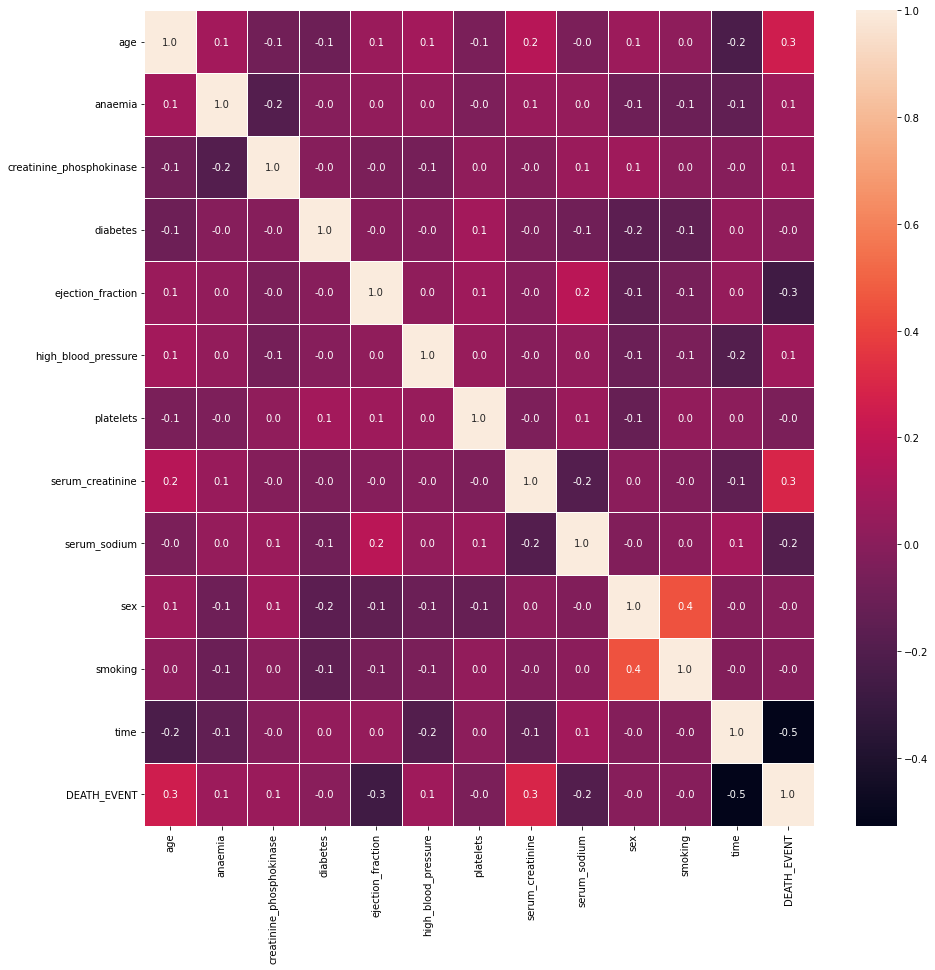

In [4]:
# visualisasi menggunakan heatmap
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

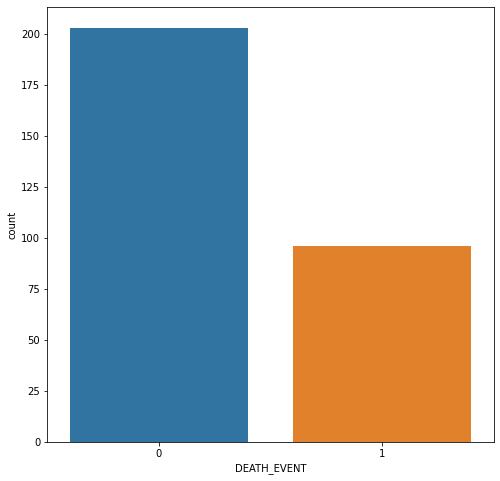

In [3]:
# visualisasi menggunakan bar chart
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(x=df.DEATH_EVENT, data=df)

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

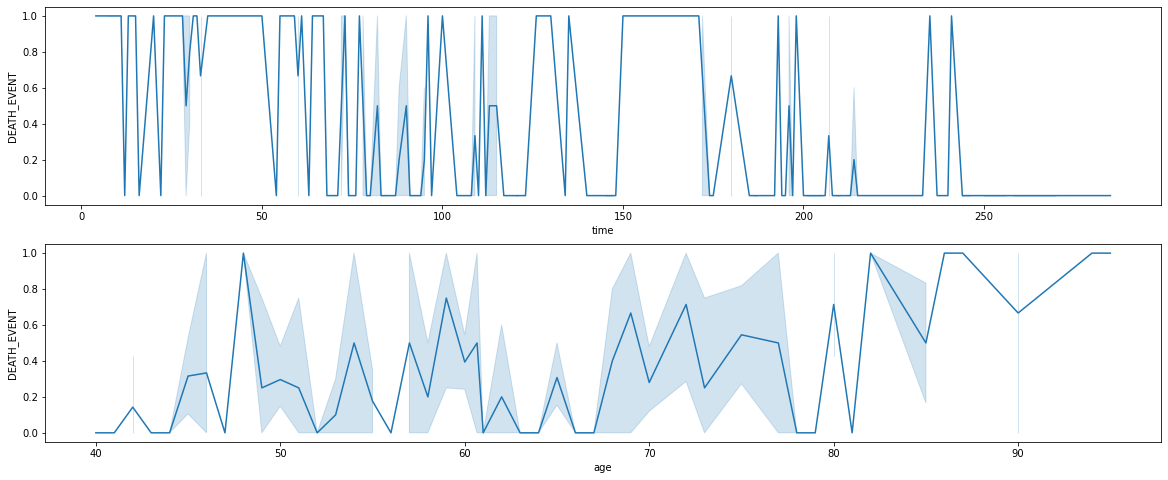

In [6]:
fig,(ax1,ax2) = plt.subplots(2, 1, figsize=(20,8))
sns.lineplot(x=df.time, y=df.DEATH_EVENT, data=df, ax=ax1)
sns.lineplot(x=df.age, y=df.DEATH_EVENT, data=df, ax=ax2)

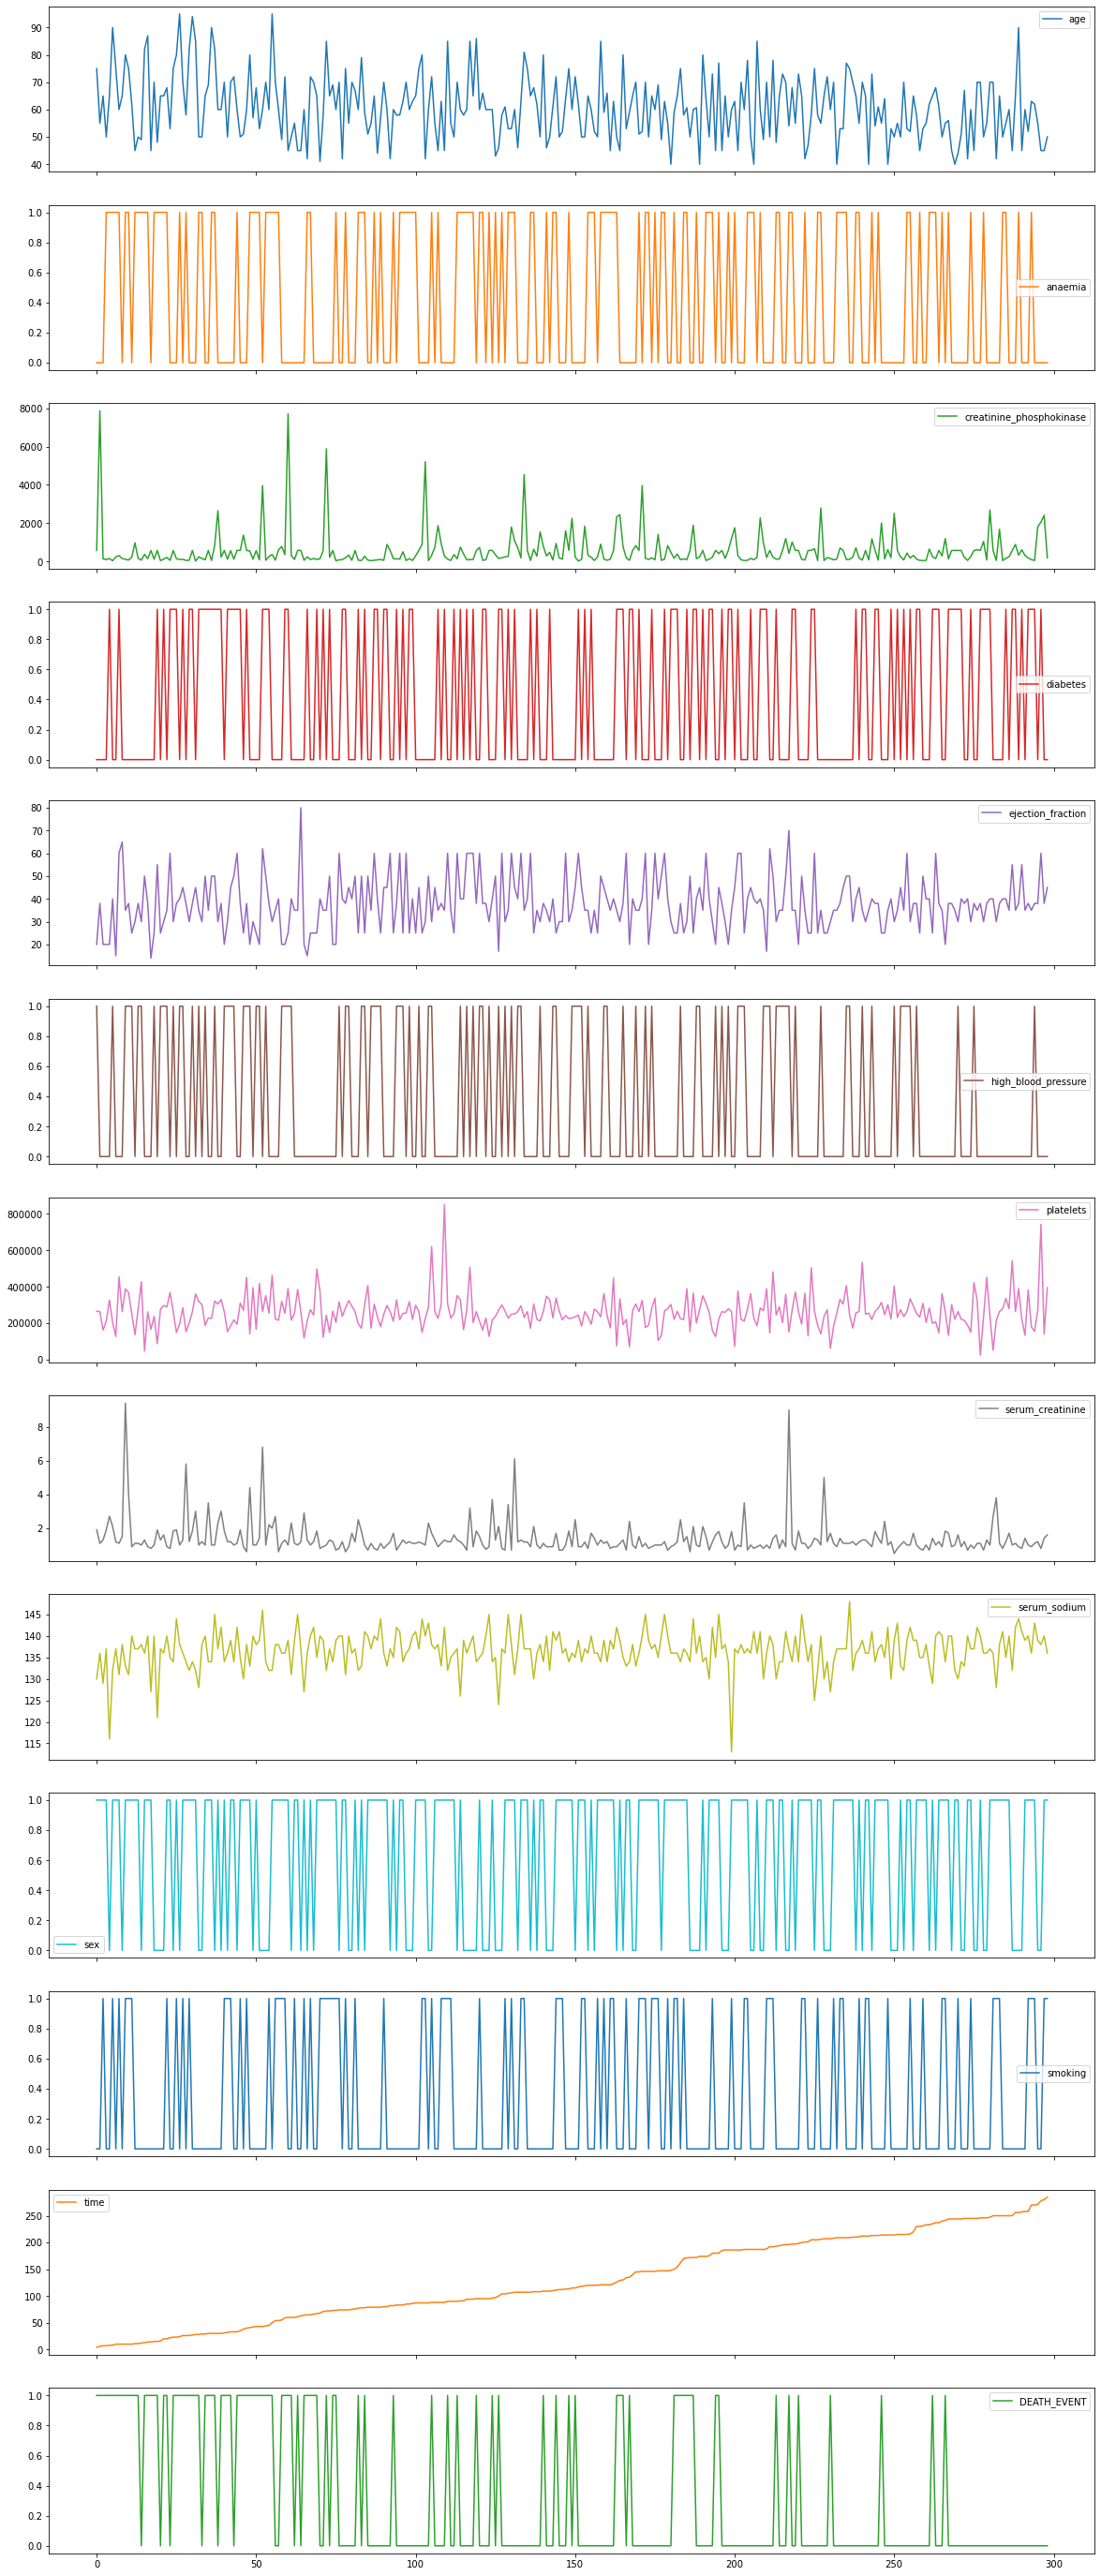

In [7]:
df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots=True, figsize=(20, 50))
plt.show()

### Splitting Data Training and Data Testing

In [3]:
# menentukan X dan y
X = df.drop(columns='DEATH_EVENT')
y = df.DEATH_EVENT

# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### Membangun 3 pipeline dengan 3 model berbeda

In [5]:
# pipeline RandomForest
pipe_RF = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [7]:
# pipeline DecisionTree
pipe_DT = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

pipe_DT.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [8]:
# pipeline LogisticRegression
pipe_LR = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

pipe_LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Modelling

In [6]:
# RandomForest
y_pred = pipe_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.88      0.83      0.86        18

    accuracy                           0.92        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



In [9]:
# DecisionTree
y_pred = pipe_DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.69      0.61      0.65        18

    accuracy                           0.80        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.79      0.80      0.80        60



In [10]:
# LogisticRegression
y_pred = pipe_LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.92      0.67      0.77        18

    accuracy                           0.88        60
   macro avg       0.90      0.82      0.85        60
weighted avg       0.89      0.88      0.88        60



Dari ketiga machine learning diatas yang digunakan, model RandomForest memiliki angka persentase paling tinggi.

### Test predict new data

In [16]:
df[df.DEATH_EVENT == 1].head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [17]:
df[df.DEATH_EVENT == 0].head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0


In [19]:
columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
new_data_died = [75, 0, 582, 0, 20, 1, 265000, 1.9, 130, 1, 0, 4]
new_data_lived = [49, 1, 80, 0, 30, 1, 427000, 1, 138, 0, 0, 12]

In [20]:
df_data = pd.DataFrame([new_data_died, new_data_lived], columns=columns)
df_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265000,1.9,130,1,0,4
1,49,1,80,0,30,1,427000,1.0,138,0,0,12


In [26]:
pipe_RF.predict(df_data)[1]

0

In [29]:
output = {0:'Lived',1:'Died'}

# LogisticRegression
print(output[pipe_LR.predict(df_data)[0]])

# RandomForest
print(output[pipe_RF.predict(df_data)[0]])

# DecisionTree
print(output[pipe_DT.predict(df_data)[0]])

Died
Died
Died


In [30]:
# Simpan model
with open('deployment/pipe_RF.pkl','wb') as f:
    pickle.dump(pipe_RF,f)